In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import minimize
#from scipy.interpolate import spline
import scipy.stats as stat
import pandas as pd
import seaborn as sn

In [6]:
SMALL_SIZE = 19
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

matplotlib.rcParams['font.family'] = "serif"


matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['xtick.major.width'] = 3
matplotlib.rcParams['xtick.minor.size'] = 4
matplotlib.rcParams['xtick.minor.width'] = 2
matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['ytick.major.width'] = 3
matplotlib.rcParams['axes.linewidth'] = 2

#plt.rcParams.update(plt.rcParamsDefault)
#para resetar o matplotlib

In [7]:
X = [56,75,45,71,62,64,58,80,76,61]
Y = [66,70,40,60,65,56,59,77,67,63]

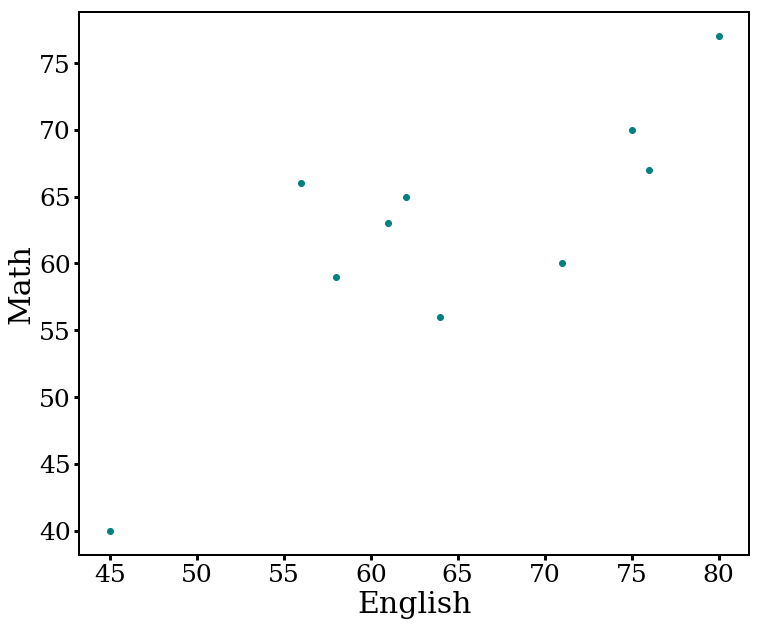

In [8]:
plt.figure(figsize=(12,10))
plt.xlabel('English')
plt.ylabel('Math')
plt.plot(X,Y,'o',color='teal')
plt.savefig('MathVsEnglish.png', bbox_inches='tight')

# Person’s correlation coefficient
$r_{\text{Pearson}}=\frac{ \sum_{i}^n \left( x_{i} - \overline{x} \right) \left( y_{i} - \overline{y} \right)}{ \sqrt{ \sum_{i}^n \left( x_{i} - \overline{x} \right)^{2} \sum_{i}^n \left( y_{i} - \overline{y} \right)^{2}}}$

In [15]:
#Pearson correlation
n = len(X)

mx = np.sum(X)/n
my = np.sum(Y)/n
Num = []
D1 = []
D2 = []
for i in range (n):
    Num.append( (X[i]-mx)*(Y[i]-my) )
    D1.append(((X[i]-mx)**2))
    D2.append(((Y[i]-my)**2))

Dem = np.sum(D1)*np.sum(D2)
rp = np.sum(Num)/Dem**0.5


print('Correlation X and Y:')

print('Pearson correlation coefficient by equation: %0.2f' %rp)

rpearson_np = np.corrcoef(X,Y)
print('Pearson correlation coefficient by NumPy module: %0.2f' %rpearson_np[0,1])

rpearson_sp = stat.pearsonr(X,Y)[0]
print('Pearson correlation coefficient by SciPy module: %0.2f' %rpearson_sp)

Correlation X and Y:
Pearson correlation coefficient by equation: 0.81
Pearson correlation coefficient by NumPy module: 0.81
Pearson correlation coefficient by SciPy module: 0.81


Correlation X and Y:
Pearson correlation coefficient by equation: 0.81
Pearson correlation coefficient by NumPy module: 0.81
Pearson correlation coefficient by SciPy module: 0.81


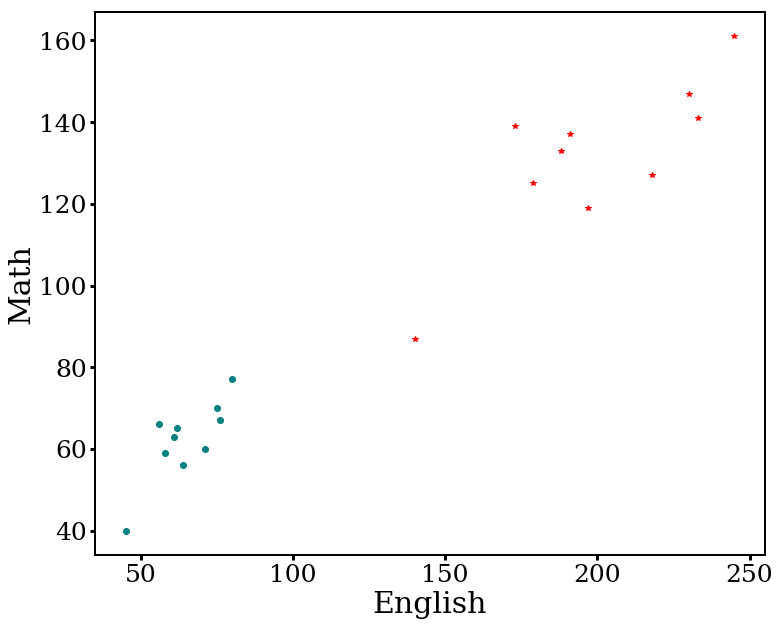

In [14]:
X = [56,75,45,71,62,64,58,80,76,61]
Y = [66,70,40,60,65,56,59,77,67,63]
a = 5
b = 3
c = 7
d = 2
Xnew = []
Ynew = []
for i in range (len(X)):
    Xnew.append(a + b*X[i])
    Ynew.append(c + d*Y[i])
#print(Xnew)
#print(Ynew)
plt.figure(figsize=(12,10))
plt.xlabel('English')
plt.ylabel('Math')
plt.plot(X,Y,'o',color='teal')
plt.plot(Xnew,Ynew,'*', color='red')
plt.savefig('MathVsEnglish_v2.png', bbox_inches='tight')

#Pearson correlation
n = len(X)

mx = np.sum(Xnew)/n
my = np.sum(Ynew)/n
Num = []
D1 = []
D2 = []
for i in range (n):
    Num.append( (Xnew[i]-mx)*(Ynew[i]-my) )
    D1.append(((Xnew[i]-mx)**2))
    D2.append(((Ynew[i]-my)**2))

Dem = np.sum(D1)*np.sum(D2)
rp = np.sum(Num)/Dem**0.5


print('Correlation X and Y:')

print('Pearson correlation coefficient by equation: %0.2f' %rp)

rpearson_np = np.corrcoef(X,Y)
print('Pearson correlation coefficient by NumPy module: %0.2f' %rpearson_np[0,1])

rpearson_sp = stat.pearsonr(X,Y)[0]
print('Pearson correlation coefficient by SciPy module: %0.2f' %rpearson_sp)

# Spearman’s rank order correlation coefficient
$r_{\text{Spearman}}=1-\frac{6 \sum_{i}^n d^{2}_{i}}{n \left( n^{2} - 1 \right)}$

In [13]:
#Spearman rank-order correlation
ord_X = sorted(X,reverse=True)
ord_Y = sorted(Y,reverse=True)
#ord_rank = np.arange(1,n+1,1)
rank_X = []
rank_Y = []
while len(rank_X) != n:
    for j in range (n):
        for i in range (n):
            if ord_X[i]==X[j]:
                rank_X.append(i+1)
while len(rank_Y) != n:
    for j in range (n):
        for i in range (n):
            if ord_Y[i]==Y[j]:
                rank_Y.append(i+1)
#print(rank_X)
#print(rank_Y)
d_2 = []
for i in range (n):
    d_2.append((rank_X[i]-rank_Y[i])**2)
Sd_2 = np.sum(d_2)
#print(Sd_2)
rs = 1 - 6*Sd_2/(n*(n**2-1))

    

print('Correlation X and Y:')

print('Spearman rank-order correlation coefficient by equation: %0.2f' %rs)

rspearman_sp = stat.spearmanr(X,Y)[0]
print('Spearman correlation coefficient by SciPy module: %0.2f' %rspearman_sp)

Correlation X and Y:
Spearman rank-order correlation coefficient by equation: 0.67
Spearman correlation coefficient by SciPy module: 0.67


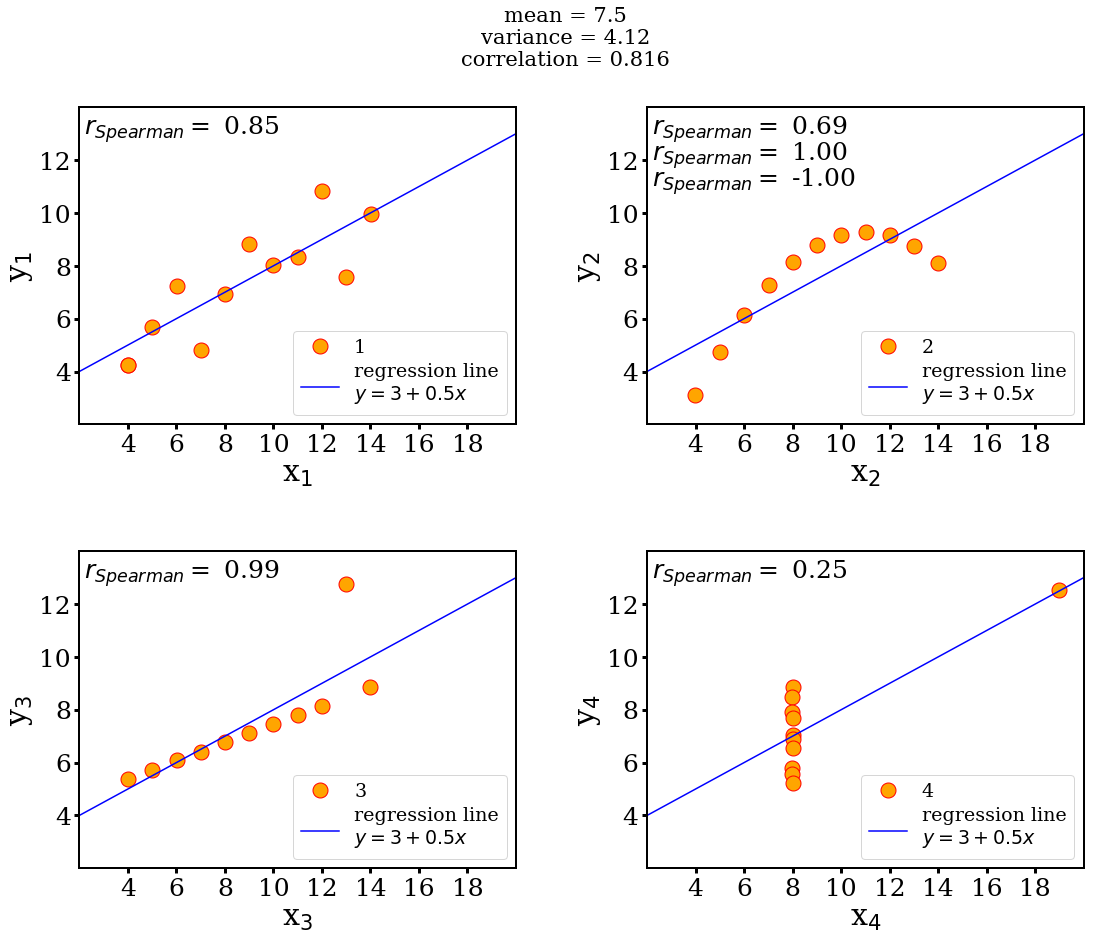

In [99]:
data = np.loadtxt('Data.txt',float)
rspearman1 = stat.spearmanr(data[:,0],data[:,1])[0]
rspearman2 = stat.spearmanr(data[0:11,2],data[0:11,3])[0]
rspearman2_1 = stat.spearmanr(data[0:7,2],data[0:7,3])[0]
rspearman2_2 = stat.spearmanr(data[7:11,2],data[7:11,3])[0]
rspearman3 = stat.spearmanr(data[0:11,4],data[0:11,5])[0]
rspearman4 = stat.spearmanr(data[0:11,6],data[0:11,7])[0]
#print('Caso 1 = ',rspearman1,'Caso 2 = ',rspearman2,'Caso 3 =',rspearman3,"Caso 4 =",rspearman4)

plt.figure(figsize=(18,14))
x = np.arange(0,24,2)
x_tick = np.arange(4,20,2)
y_tick = np.arange(4,14,2)
plt.suptitle('mean = 7.5\nvariance = 4.12\ncorrelation = 0.816', size=21)
plt.subplot(2,2,1)
plt.xlabel('x$_1$')
plt.xlim(2,20)
plt.xticks(x_tick)
plt.ylabel('y$_1$')
plt.ylim(2,14)
plt.yticks(y_tick)
plt.plot(data[:,0],data[:,1],'o',color='red',markersize=15,markerfacecolor='orange', label='1')
plt.plot(x,3+0.5*x,'b-',label='regression line\n$y=3+0.5x$')
plt.annotate('$r_{Spearman}=$ %0.2f' %rspearman1,
            xy=(2.2, 12.5),
            xycoords='data',
            xytext=(2.2, 13),
            textcoords='data')
plt.legend(loc='lower right')

plt.subplot(2,2,2)
plt.xlabel('x$_2$')
plt.xlim(2,20)
plt.xticks(x_tick)
plt.ylabel('y$_2$')
plt.ylim(2,14)
plt.yticks(y_tick)
plt.plot(data[0:11,2],data[0:11,3],'o',color='red',markersize=15,markerfacecolor='orange', label='2')
#plt.plot(data[0:7,2],data[0:7,3],'o',color='black',markersize=15,markerfacecolor='teal')
#plt.plot(data[7:11,2],data[7:11,3],'o',color='blue',markersize=15,markerfacecolor='purple')
plt.plot(x,3+0.5*x,'b-',label='regression line\n$y=3+0.5x$')
plt.annotate('$r_{Spearman}=$ %0.2f' %rspearman2,
            xy=(2.2, 12.5),
            xycoords='data',
            xytext=(2.2, 13),
            textcoords='data')
plt.annotate('$r_{Spearman}=$ %0.2f' %rspearman2_1,
            xy=(2.2, 12),
            xycoords='data',
            xytext=(2.2, 12),
            textcoords='data')
plt.annotate('$r_{Spearman}=$ %0.2f' %rspearman2_2,
            xy=(2.2, 12),
            xycoords='data',
            xytext=(2.2, 11),
            textcoords='data')
plt.legend(loc='lower right')

plt.subplot(2,2,3)
plt.xlabel('x$_3$')
plt.xlim(2,20)
plt.xticks(x_tick)
plt.ylabel('y$_3$')
plt.ylim(2,14)
plt.yticks(y_tick)
plt.plot(data[0:11,4],data[0:11,5],'o',color='red',markersize=15,markerfacecolor='orange', label='3')
plt.plot(x,3+0.5*x,'b-',label='regression line\n$y=3+0.5x$')
plt.annotate('$r_{Spearman}=$ %0.2f' %rspearman3,
            xy=(2.2, 12.5),
            xycoords='data',
            xytext=(2.2, 13),
            textcoords='data')
plt.legend(loc='lower right')

plt.subplot(2,2,4)
plt.xlabel('x$_4$')
plt.xlim(2,20)
plt.xticks(x_tick)
plt.ylabel('y$_4$')
plt.ylim(2,14)
plt.yticks(y_tick)
plt.plot(data[0:11,6],data[0:11,7],'o',color='red',markersize=15,markerfacecolor='orange', label='4')
plt.plot(x,3+0.5*x,'b-',label='regression line\n$y=3+0.5x$')
plt.annotate('$r_{Spearman}=$ %0.2f' %rspearman4,
            xy=(2.2, 12.5),
            xycoords='data',
            xytext=(2.2, 13),
            textcoords='data')
plt.legend(loc='lower right')

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.savefig('Anscombe_quartet.jpg', bbox_inches='tight')
plt.show()



In [92]:
#X = data[:,0]; Y = data[:,1]
#X = data[:,2]; Y = data[:,3]
X = data[:,4]; Y = data[:,5]

#Spearman rank-order correlation
n = len(X)
ord_X = sorted(X,reverse=True)
ord_Y = sorted(Y,reverse=True)
#ord_rank = np.arange(1,n+1,1)
rank_X = []
rank_Y = []
while len(rank_X) != n:
    for j in range (n):
        for i in range (n):
            if ord_X[i]==X[j]:
                rank_X.append(i+1)
while len(rank_Y) != n:
    for j in range (n):
        for i in range (n):
            if ord_Y[i]==Y[j]:
                rank_Y.append(i+1)
#print(rank_X)
#print(rank_Y)
d_2 = []
for i in range (n):
    d_2.append((rank_X[i]-rank_Y[i])**2)
Sd_2 = np.sum(d_2)
#print(Sd_2)
rs = 1 - 6*Sd_2/(n*(n**2-1))

    

print('Correlation X and Y:')

print('Spearman rank-order correlation coefficient by equation: %0.2f' %rs)

Correlation X and Y:
Spearman rank-order correlation coefficient by equation: 0.99


In [4]:
dat = pd.read_csv("Data.csv")
dat[:12]

x$_1$      y$_1$      x$_2$     y$_2$      x$_3$      y$_3$  \
0    4.012487   4.260777   3.989866  3.107714   3.996209   5.389920   
1    4.002170   4.260784   4.996715  4.751334   5.006617   5.729443   
2    5.015055   5.680710   6.003208  6.131794   6.006127   6.090186   
3    6.994776   4.812786   7.009361  7.259623   6.994810   6.419098   
4    6.007488   7.241709   8.004398  8.155856   7.994320   6.779841   
5    8.008570   6.938001   8.999066  8.778405   8.993873   7.108753   
6    9.001419   8.821418  10.004209  9.158864   9.993398   7.458886   
7   10.001155   8.044880  11.008983  9.265638  11.003777   7.819629   
8   11.002267   8.336351  12.013458  9.151359  11.992446   8.159151   
9   13.002765   7.579243  13.017550  8.752869  13.991509   8.848806   
10  12.006226  10.834369  13.999724  8.122767  12.986204  12.753316   
11  14.006580   9.966430        NaN       NaN        NaN        NaN   

        x$_4$      y$_4$  
0    8.002328   8.860605  
1    7.992149   8.474174  
2    7.992889   7.920650  
3    8.003892   7.690893  
4    8.004743   7.053818  
5    8.004953   6.897160  
6    8.016109   6.552521  
7    7.995737   5.790104  
8    7.985349   5.560331  
9    7.996477   5.236579  
10  18.992096  12.513712  
11        NaN        NaN

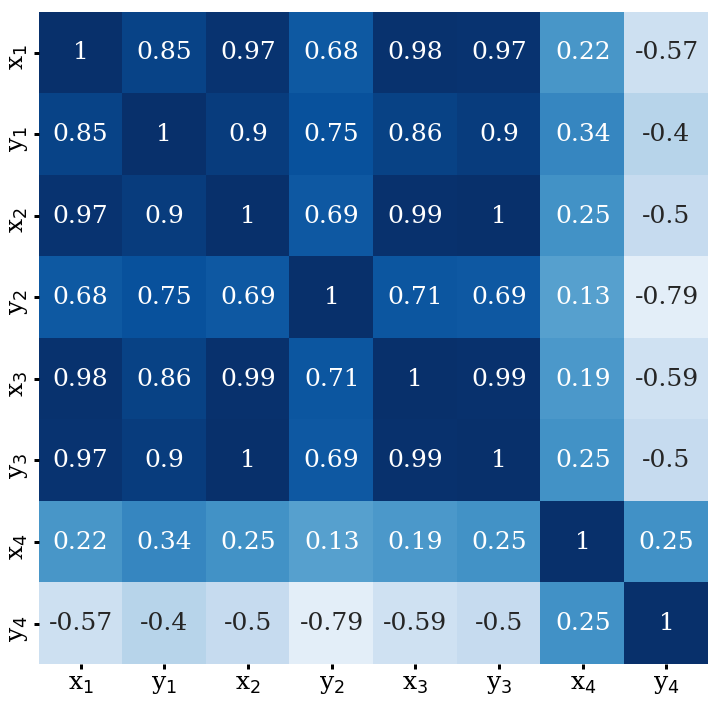

In [7]:
Color = 'Blues'
plt.figure(figsize=(12,12))
#matrix = np.triu(dat.corr(method = 'spearman'))
sn.heatmap(dat.corr(method ='spearman'), annot=True,cmap=Color,cbar=False,vmin=-1, vmax=1)#, mask=matrix)


plt.savefig('Correlation_matrix.jpg', bbox_inches='tight')